---
## 1. Installation
## 2. Display Molecule
## 3. Pattern Search
## 4. Finger Print
>### Extended-Connectivity Fingerprint (ECFP)
>### Understanding (ECFP)
>### Morgan Finger Print 

## 5. Similarity
## 6. Ring Structure
>### Looping over Atoms and Bonds
>### Ring Information
---

---
# 1. Installation
## How to install RDKit with Conda @ Terminal
  
    conda create -c conda-forge -n rdkit-env rdkit  
    https://www.rdkit.org/docs/Install.html

    pip install jupyterlab
    pip install --upgrade rdkit


## How to install RDKit with Conda @ Jupyter Notebook

    import sys         # sys package는 표준 라이브러리.   
    print(sys.prefix)  # 시스템 경로 위치를 확인  
    
    >> /Users/sulee/opt/anaconda3

    !conda install --yes --prefix {sys.prefix} rdkit -c conda-forge
    
    !conda remove rdkit    ## RDKit 제거
    
---

In [1]:
import sys
print(sys.prefix)
#!conda install --yes --prefix {sys.prefix} rdkit -c conda-forge

/Users/sulee/opt/anaconda3


In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np
import pandas as pd

from PIL import Image
import IPython.display as display
# import rdkit
# rdkit.__version__

/Users/sulee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


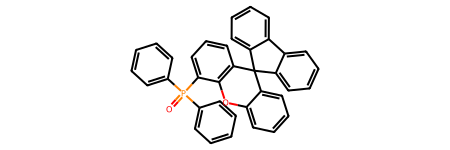

In [9]:
mol = Chem.MolFromSmiles('O=P(c1ccccc1)(c1ccccc1)c1cccc2c1Oc1ccccc1C21c2ccccc2-c2ccccc21')
mol is None
mol

In [4]:
smiles = Chem.MolToSmiles(mol)
print(smiles)

N[C@@H](CS)C(=O)O


In [5]:
mw = Descriptors.MolWt(mol)
print(mw)

121.16099999999999


---
# 2. Display Molecule
## Display molecules
> smiles_list =[ ]  
> using For loop:  
>> mol_list = [ ]  
>> for smi in smiles_list:

#### Draw Image / molsPerRow / subImgSize 
    img = Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(300,300))   
    img = Draw.MolToImage(mol, size=(300,300), kekulize=True)
#### Save Image   
    with open('sample.png', mode='wb') as f:   
        f.writhe(img.date)
        
#### Display Image 
    from PIL import Image
    import IPython.display as display
    
    display.display(Image.open('sample.png')
---
## List Comprehension
    mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list] 
#### Draw Image  
    img = Draw.MolsToGridImage(mol_list, molsPerRow=4, subImgSize=(300,300))   
    img = Draw.MolToImage(mol, size=(300,300), kekulize=True)
#### Display Image 
    from PIL import Image
    import IPython.display as display   
    display.display(img)
#### Information of object
    dir(img)...  

#### Atom Index / Image size   
    IPythonConsole.drawOptions.addAtomIndices = True  
    IPythonConsole.molSize = 400,400  
---

<class 'IPython.core.display.Image'>


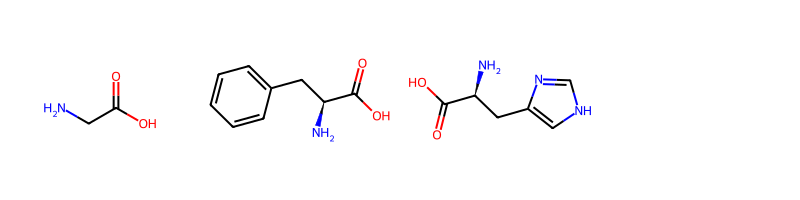

In [6]:
# from PIL import Image
# import IPython.display as display

smiles_list=['C(C(=O)O)N','c1ccc(cc1)C[C@@H](C(=O)O)N',
             'O=C([C@H](CC1=CNC=N1)N)O']
mol_list = []
for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    mol_list.append(mol)
    
img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
print(type(img))
# dir(img)
# img.save('sample.png')
with open('sample.png', mode='wb') as f:
    f.write(img.data)
display.display(Image.open('sample.png'))


['_ACCEPTABLE_EMBEDDINGS', '_FMT_GIF', '_FMT_JPEG', '_FMT_PNG', '_MIMETYPES', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_data', '_data_and_metadata', '_find_ext', '_mimetype', '_read_flags', '_repr_html_', '_repr_jpeg_', '_repr_mimebundle_', '_repr_png_', '_retina_shape', '_show_mem_addr', 'alt', 'data', 'embed', 'filename', 'format', 'height', 'metadata', 'reload', 'retina', 'unconfined', 'url', 'width']


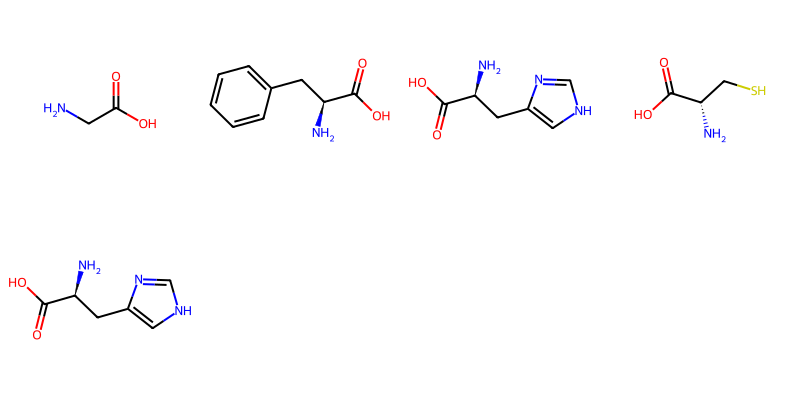

png


In [7]:
smile_list=['C(C(=O)O)N','c1ccc(cc1)C[C@@H](C(=O)O)N',
             'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S', 'N[C@@H](Cc1c[nH]cn1)C(=O)O']
mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list]

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
print(dir(img))

display.display(img)
print(img.format)

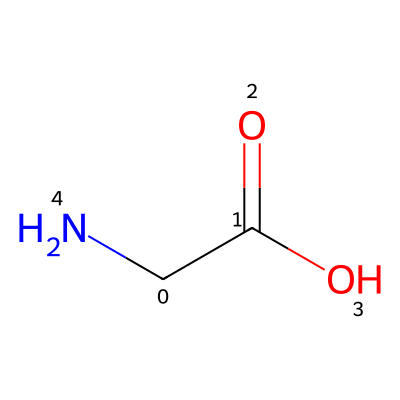

In [8]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400,400

smile_list=['C(C(=O)O)N','c1ccc(cc1)C[C@@H](C(=O)O)N',
             'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S', 'N[C@@H](Cc1c[nH]cn1)C(=O)O']
mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list]
mol_list[0]

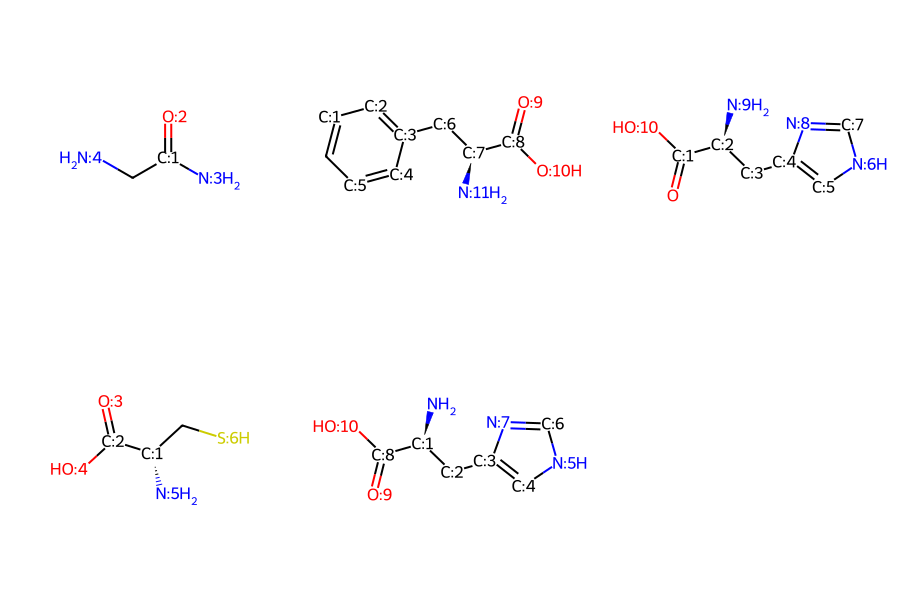

In [9]:
IPythonConsole.drawOptions.addAtomIndices = False

def mol_with_atom_index(mol):                  # atom index 넣는 function 
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

smile_list=['C(C(=O)N)N','c1ccc(cc1)C[C@@H](C(=O)O)N',
             'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S', 'N[C@@H](Cc1c[nH]cn1)C(=O)O']

mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list]
mol_list = [mol_with_atom_index(mol) for mol in mol_list]

img = Draw.MolsToGridImage(mol_list, molsPerRow=3, subImgSize=(300,300))
display.display(img)


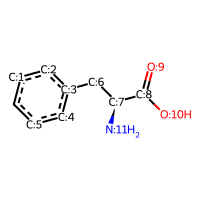

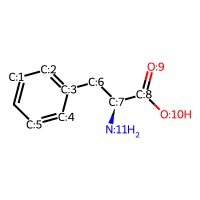

In [10]:
def mol_with_atom_index(mol):                  # atom index 넣는 function 
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

smile_list=['C(C(=O)N)N','c1ccc(cc1)C[C@@H](C(=O)O)N','O=C([C@H](CC1=CNC=N1)N)O'
            ,'C([C@@H](C(=O)O)N)S', 'N[C@@H](Cc1c[nH]cn1)C(=O)O']

mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list]
mol = mol_with_atom_index(mol_list[1])
mol_list[1]
# Draw.MolToImage(mol_list[1],fitImage=False)
# display.display(img)
img1 = Draw.MolToImage(mol_list[1], size=(200,200), kekulize=False)
img2 = Draw.MolToImage(mol_list[1], size=(200,200), kekulize=True)
display.display(img1, img2)

---
# 3. Pattern Search
## SMARTS 

Theory: https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html   
Tutorial: https://www.daylight.com/dayhtml_tutorials/languages/smarts/index.html  
Example: https://www.daylight.com/dayhtml_tutorials/languages/smarts/smarts_examples.html  
### Pattern Match

> pattern = Chem.MolFromSmiles('CC(N)C')   
> print(<b>mol.HasSubstructMatch(pattern)</b>)      
---

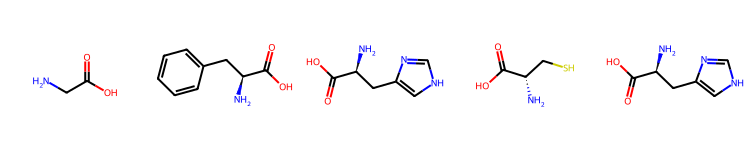

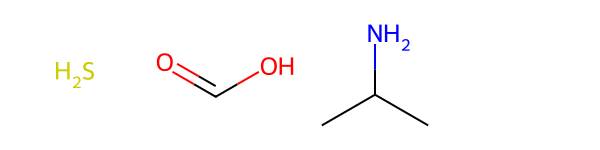

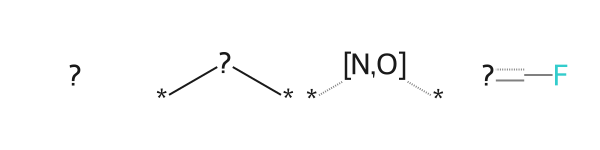

==  [r5]  ==
False : NCC(=O)O
False : N[C@@H](Cc1ccccc1)C(=O)O
True : N[C@@H](Cc1c[nH]cn1)C(=O)O
False : N[C@@H](CS)C(=O)O
True : N[C@@H](Cc1c[nH]cn1)C(=O)O
==  *-[N&!R]-*  ==
False : NCC(=O)O
False : N[C@@H](Cc1ccccc1)C(=O)O
False : N[C@@H](Cc1c[nH]cn1)C(=O)O
False : N[C@@H](CS)C(=O)O
False : N[C@@H](Cc1c[nH]cn1)C(=O)O
==  *~[#7,#8]~*  ==
False : NCC(=O)O
False : N[C@@H](Cc1ccccc1)C(=O)O
True : N[C@@H](Cc1c[nH]cn1)C(=O)O
False : N[C@@H](CS)C(=O)O
True : N[C@@H](Cc1c[nH]cn1)C(=O)O
==  F[$(*)]  ==
False : NCC(=O)O
False : N[C@@H](Cc1ccccc1)C(=O)O
False : N[C@@H](Cc1c[nH]cn1)C(=O)O
False : N[C@@H](CS)C(=O)O
False : N[C@@H](Cc1c[nH]cn1)C(=O)O
==  S  ==
False : NCC(=O)O
False : N[C@@H](Cc1ccccc1)C(=O)O
False : N[C@@H](Cc1c[nH]cn1)C(=O)O
True : N[C@@H](CS)C(=O)O
False : N[C@@H](Cc1c[nH]cn1)C(=O)O
==  O=CO  ==
True : NCC(=O)O
True : N[C@@H](Cc1ccccc1)C(=O)O
True : N[C@@H](Cc1c[nH]cn1)C(=O)O
True : N[C@@H](CS)C(=O)O
True : N[C@@H](Cc1c[nH]cn1)C(=O)O
==  CC(C)N  ==
False : NCC(=O)O
True : N[C@

In [11]:
## Example ##

smile_list=['C(C(=O)O)N','c1ccc(cc1)C[C@@H](C(=O)O)N',
             'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S', 'N[C@@H](Cc1c[nH]cn1)C(=O)O']
mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list]
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, subImgSize=(150,150))

smi_lst = ['S','C(=O)O','CC(N)C']
smt_lst = ['[r5]', '*-[N;!R]-*', '*~[#7,#8]~*', 'F[$([#1,*])]']
pattern_smi = [Chem.MolFromSmiles(mol) for mol in smi_lst]
pattern_smt = [Chem.MolFromSmarts(mol) for mol in smt_lst]
img_smi = Draw.MolsToGridImage(pattern_smi, molsPerRow=4, subImgSize=(150,150))
img_smt = Draw.MolsToGridImage(pattern_smt, molsPerRow=4, subImgSize=(150,150))
display.display(img, img_smi, img_smt)

for pattern in pattern_smt:
    print("== ",Chem.MolToSmarts(pattern)," ==")
    for mol in mol_list:
        print(mol.HasSubstructMatch(pattern) , ":", Chem.MolToSmiles(mol))

for pattern in pattern_smi:
    print("== ",Chem.MolToSmiles(pattern)," ==")
    for mol in mol_list:
        print(mol.HasSubstructMatch(pattern) , ":", Chem.MolToSmiles(mol))

smt_lst = 


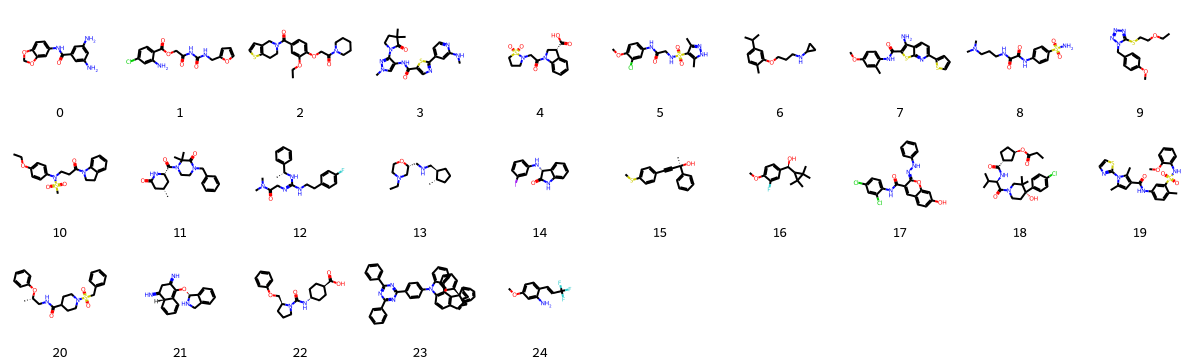

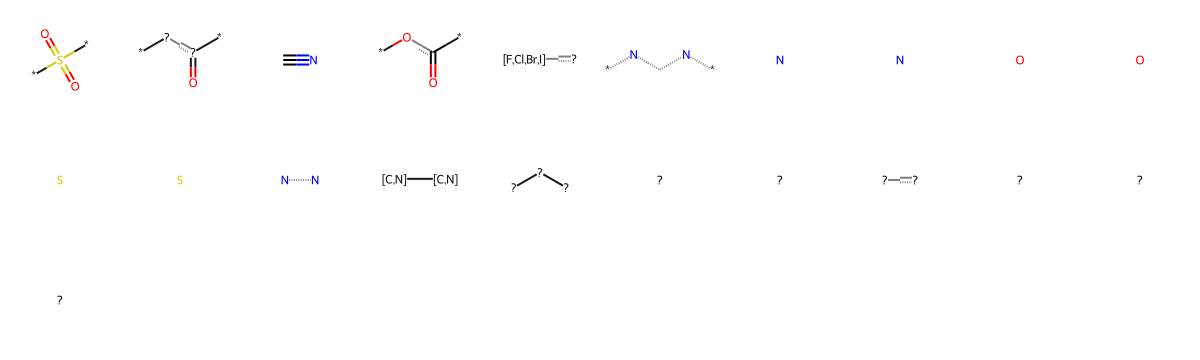

,S(=O)(=O)(-*)-*,*-[N&!R][C&!R](=O)-*,C#N,*-OC(=O)-*,"[F,Cl,Br,I][$(*)]",*~[#7&R]~[#6&R]~[#7&R]~*,[N&R],[n&R],[O&R],[o&R],...,[s&R],[#7]~[#7],"[c,n]-[c,n]","[R]-[C,N,O,S;!R]-[R]",[R1],[R2],[R3][r3],[r4],[r5],[r6]
0,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,True,True
1,False,True,False,True,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,True,True,True,False,False,True,True
3,False,True,False,False,False,True,True,True,False,False,...,True,True,True,False,True,False,False,False,True,True
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,True,False,False,True,True
5,True,True,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
7,False,True,False,False,False,False,False,True,False,False,...,True,False,True,False,True,True,False,False,True,True
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
9,False,False,False,False,False,True,False,True,False,False,...,False,True,False,True,True,False,False,False,True,True


In [12]:
# import pandas as pd

# smi_list=['CC[C@H]1CCCCN1C(=O)[C@@H](C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N', 'O[C@@H](CNC1CC1)CN1CCc2sccc2C1', 
#           'N#CCCNC(=O)[C@@]1(O)CCSC1', 'COC[C@H]1CN(c2ccc(OCC[C@@H](C)O)cc2)C(=O)O1', 'N#Cc1c(-c2ccccc2OCC(N)=O)[nH]c(C(N)=O)c1N', 
#           'C=CCC(=O)Cc1cncc(Br)c1', 'COc1ccc(Br)cc1C(=O)NC(=S)Nc1ccc(C)cc1', 'Cc1cccc(NC(=O)C2CCN(S(=O)(=O)c3cc(Cl)ccc3Cl)CC2)c1C', 
#           'C[C@H]1CN(C(=O)N2CCO[C@H](CC(=O)O)C2)C[C@@H](C)O1', 'CCN(CC)C(=O)c1ccccc1NC(=O)CCc1nc(-c2cccnc2)no1']
smi_dict = {0: 'CC[C@H]1CCCCN1C(=O)[C@@H](C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N', 1: 'O[C@@H](CNC1CC1)CN1CCc2sccc2C1', 2: 'N#CCCNC(=O)[C@@]1(O)CCSC1', 
            3: 'COC[C@H]1CN(c2ccc(OCC[C@@H](C)O)cc2)C(=O)O1', 4: 'N#Cc1c(-c2ccccc2OCC(N)=O)[nH]c(C(N)=O)c1N', 5: 'C=CCC(=O)Cc1cncc(Br)c1', 
            6: 'COc1ccc(Br)cc1C(=O)NC(=S)Nc1ccc(C)cc1', 7: 'Cc1cccc(NC(=O)C2CCN(S(=O)(=O)c3cc(Cl)ccc3Cl)CC2)c1C', 8: 'C[C@H]1CN(C(=O)N2CCO[C@H](CC(=O)O)C2)C[C@@H](C)O1', 
            9: 'CCN(CC)C(=O)c1ccccc1NC(=O)CCc1nc(-c2cccnc2)no1', 11: 'CC[C@@]1(C)[C@@H](Br)C[C@@H]1Oc1ccc(Cl)c2ccccc12', 
            13: 'Cc1cc(C)c(C2=C(O)[C@@H]3[C@H]4O[C@H](C[C@H]4c4cccc(C#N)c4)[C@@H]3C2=O)c(C)c1', 
            15: 'O=C(COC(=O)C1CCC1)NC(=O)c1ccccc1', 19: 'C[C@@](N)(CNC1CCC1)[C@]12C[C@H]3C[C@H](C[C@H](C3)C1)C2',
            20: 'CNc1cc(-c2ncc(C(=O)Nc3cn(C)nc3N3CCC(C)(C)C3=O)s2)ccn1', 21: 'O=C(O)[C@H]1CN(C(=O)CN2CCCS2(=O)=O)c2ccccc21', 22: 'COc1ccc(NC(=O)CNS(=O)(=O)c2c(C)n[nH]c2C)cc1Cl',
            23: 'C1=CC=C2/C3=C\\C=C/C=C/C(=C1)[C@@]2(c1ccccc1)c1c3ccc2c1c1ccccc1n2-c1ccc(-c2nc(-c3ccccc3)nc(-c3ccccc3)n2)cc1',
            24: 'O=C(Nc1ccc(Cl)cc1Cl)c1cc2ccc(O)cc2o/c1=N\\Nc1ccccc1', 25:'COc1ccc(/C=C/C(F)(F)F)c(N)c1'}

######
train_smi = ['Nc1cc(N)cc(C(=O)Nc2ccc3c(c2)OCO3)c1', 'Nc1cc(Cl)ccc1C(=O)OCC(=O)NC(=O)NCc1ccco1', 'CCOc1cc(C(=O)N2CCc3sccc3C2)ccc1OCC(=O)N1CCCCC1', 
              'CNc1cc(-c2ncc(C(=O)Nc3cn(C)nc3N3CCC(C)(C)C3=O)s2)ccn1', 'O=C(O)[C@H]1CN(C(=O)CN2CCCS2(=O)=O)c2ccccc21', 'COc1ccc(NC(=O)CNS(=O)(=O)c2c(C)n[nH]c2C)cc1Cl', 
              'Cc1ccc(C(C)C)cc1OCCCNC1CC1', 'COc1ccc(NC(=O)c2sc3nc(-c4cccs4)ccc3c2N)c(C)c1', 'CN(C)CCCNC(=O)C(=O)Nc1ccc(S(N)(=O)=O)cc1', 'CCOCCSc1nnnn1Cc1ccc(OC)cc1', 
              'CCOc1ccc(N(CCC(=O)N2CCc3ccccc32)S(C)(=O)=O)cc1', 'C[C@@H]1CC(=O)N[C@H](C(=O)N2CCN(Cc3ccccc3)C(=O)C2(C)C)C1', 
              'C[C@@H](N/C(=N\\CC(=O)N(C)C)NCCc1ccc(F)cc1)c1ccccc1', 'CCN1CCO[C@H](CNC[C@H]2CCC[C@@H]2C)C1', 'O=C1Nc2ccccc2[C@H]1Nc1cccc(I)c1', 
              'CSc1ccc(C#C[C@@](C)(O)c2ccccc2)cc1', 'COc1ccc([C@@H](O)C2C(C)(C)C2(C)C)cc1F', 'O=C(Nc1ccc(Cl)cc1Cl)c1cc2ccc(O)cc2o/c1=N\\Nc1ccccc1', 
              'CCC(=O)O[C@@H]1CC[C@@H](C(=O)N[C@@H](C(=O)N2CC[C@](O)(c3ccc(Cl)cc3)C(C)(C)C2)C(C)C)C1', 'COc1ccccc1NS(=O)(=O)c1cc(NC(=O)c2cc(C)n(-c3nccs3)c2C)ccc1C', 
              'C[C@@H](CNC(=O)C1CCN(S(=O)(=O)Cc2ccccc2)CC1)Oc1ccccc1', 'N=C1CC(=N)[C@H]2C=CC=CC2=C1O[C@H]1NCc2ccccc21', 'O=C(N[C@H]1CC[C@H](C(=O)O)CC1)N1CCC[C@H]1COc1ccccc1', 
              'C1=CC=C2/C3=C\\C=C/C=C/C(=C1)[C@@]2(c1ccccc1)c1c3ccc2c1c1ccccc1n2-c1ccc(-c2nc(-c3ccccc3)nc(-c3ccccc3)n2)cc1', 'COc1ccc(/C=C/C(F)(F)F)c(N)c1']
smi_dict = {}
for x in range(len(train_smi)):
    smi_dict[x]=train_smi[x]
################

mol_list=[Chem.MolFromSmiles(smi) for smi in smi_dict.values()]
img = Draw.MolsToGridImage(mol_list, molsPerRow=10, legends=[str(x) for x in smi_dict.keys()], subImgSize=(120,120))

display.display(img)

smt_lst = ['[S](=O)(=O)(-*)-*',           # sulfoxide group 
           '*-[N;!R][C;!R](=O)-*',        # amide group 
           'C#N',                         # Cyano group
           '*-OC(=O)-*',                  # Carboxyl group
           '[F,Cl,Br,I][$([#1,*])]',      # Halogen atom 포함
           '*~[#7;R]~[#6;R]~[#7;R]~*',    # -N-C-N- @ Ring
           '[N;R]','[n;R]',               # Nitrogen @ ring
           '[O;R]','[o;R]',               # Oxygen   @ ring
           '[S;R]','[s;R]',               # Sulfur   @ ring
           '[#7]~[#7]',                   # N-N bond @ ring & Chain
           '[c,n]-[c,n]',                 # [aromatic ring] - [aromatic ring]
           '[*;R]-[C,N,O,S;!R]-[*;R]',    # [ring] - [N,O,S,C] - [ring]             
           '[R1]','[R2]','[R3]'           # fused Ring 갯수
           '[r3]','[r4]','[r5]','[r6]']   # Ring Type

# smt_lst = ['*1~*~*~*~*~*~1','a']
pattern_smt = [Chem.MolFromSmarts(mol) for mol in smt_lst]
img_smt = Draw.MolsToGridImage(pattern_smt, molsPerRow=10, subImgSize=(120,120))
display.display(img_smt)

result_dict = {}

idx = [str(x) for x in smi_dict.keys()]
for pattern in pattern_smt:
    # print("== ",Chem.MolToSmarts(pattern)," ==")
    result_list = []
    for mol in mol_list:
        result_list.append(mol.HasSubstructMatch(pattern))
        # print(mol.HasSubstructMatch(pattern))
    result_dict[Chem.MolToSmarts(pattern)]=result_list

df = pd.DataFrame(
    result_dict,
    index=idx)
df

# result_dict


# df = pd.DataFrame(
#     {'price': [100, 200, 300],
#      'weight': [20.3, 15.1, 25.9]}, 
#     index=['idx_a', 'idx_b', 'idx_c'])


---
# 4. Finger Print
## Extended-Connectivity Fingerprint (ECFP)
https://docs.chemaxon.com/display/docs/extended-connectivity-fingerprint-ecfp.md
https://www.programcreek.com/python/example/89502/rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect
https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf
        
---
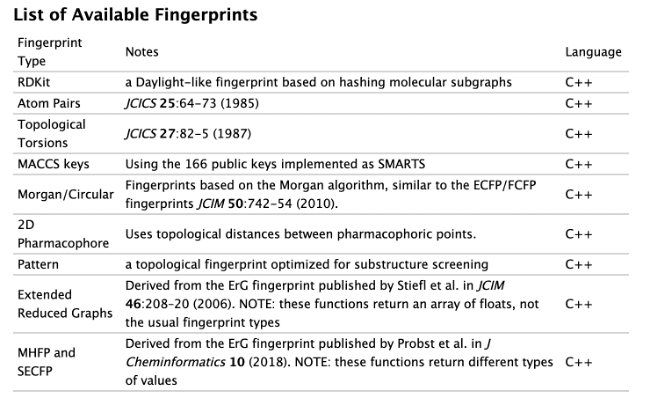

## Understanding Extended-Connectivity Fingerprints(ECFPs)

https://chemicbook.com/2021/03/25/a-beginners-guide-for-understanding-extended-connectivity-fingerprints.html
    
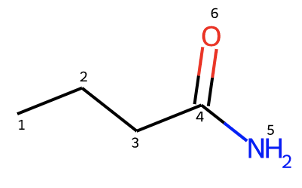
### Step 1 - Assigning an integer identifier to each atom

#### Using the Daylight atomic invariants rule.
1. Let’s try this out for our atom <b>no. 4</b> in our new molecule Butyramide and calculate the identifier.   
 First, let’s calculate all seven properties:  

> Number of non-hydrogen immediate neighbors = 3 (atom 3, 5, and 6)  
> Valency minus the number of connected hydrogens = 4 (4 - 0)  
> Atomic number = 6  
> Atomic mass = 12  
> Atomic charge = 0  
> Number of attached hydrogens = 0  
> Is it a part of a ring = 0 (no)  

2. So,  
  f4 = (3, 4, 6, 12, 0, 0, 0)  
  identifier = hash((3, 4, 6, 12, 0, 0, 0))   

> print(identifier)  
> -2155244659601281804   

3. Similarly, this process is repeated for each of the atoms, and identifiers are calculated.  
The feature set after the initial iteration will look like this:

> 1: -4080868480043360372  
> 2:  8311098529014133067  
> 3:  8311098529014133067  
> <b>4: -2155244659601281804  </b>   
> 5: -3602994677767288312  
> 6:  8573586092015465947  
> 
> <b> atom 2 and 3 have the same identifier after initial iteration >\</b> 

### Step 2 - Iteratively updating the atom identifiers

1. An array is initialized containing <b>the iteration number</b> and <b>the initial identifier</b>   
of the atom in question. For example, for the first iteration of atom <b>no. 4</b> in Butyramide,  
the array will be:  
<b>[(1, -2155244659601281804)] = [(iteration number, initial identifier)]</b>

1. Next, we add two more numbers to this array for each non-hydrogen neighbor.  
The first of these numbers is the bond order with that particular atom and   
the second is that atom’s current identifier.   
Values 1, 2, 3, and 4 are used for single, double, triple, and aromatic bonds, respectively.  
Further, to avoid any ordering dependency in this attachment list,  
the attachments are sorted using their number pairs.  

> For example, atom <b>no. 4</b> is connected to 5, 3, and 6 with a single, single and double bond, respectively.
> The feature vector will now become:  
> <b>[(1, -2155244659601281804), (1, -3602994677767288312),  
> (1, 8311098529014133067), (2, 8573586092015465947)]   
> =[(iteration number, identifier),(single_bond, identifier no. 5),  
> (single_bond, identifier no. 3),(double_bond, identifier no. 6) ] </b>

3. Same as before, this list is hashed using a hash function to <b>get an updated integer identifier.</b>   
For <b>atom 4</b>, the value will be <b>3790237506519639747</b>

> identifier_updated =   
> hash(tuple([1, -2155244659601281804, 1, -3602994677767288312, 1, 8311098529014133067, 2, 8573586092015465947]))  
> print(identifier_updated)  
> 3790237506519639747  

4. This process is repeated for all atoms for a prespecified number of iterations.  
the updated values after first iteration will be:

> 1: -3879702859024654160  
> 2:  2648074263463118673  
> 3:  9209025387859845960  
> <b>4:  3790237506519639747 </b>   
> 5: -8399737669368778010  
> 6:  3271801898087186516  
> 
> NOTE: Notice how the atom 2 and 3 have the same identifier after initial iteration   
> but it changes after the first iteration. Think why?  

> This is because the atoms are identical when we just look at them individually   
> but becomes different when looking at their environment   
> Atom 2 is connected to a -CH3 group while    
>  atom 3 is connected to a -C(=O)NH2 group.  

>> #### Initialization 
>>[-4080868480043360372, 8311098529014133067, 8311098529014133067, -2155244659601281804,
>> -3602994677767288312, 8573586092015465947]
 
>>#### After One Iteration
>>[-4080868480043360372, 8311098529014133067, 8311098529014133067, -2155244659601281804,  
>> -3602994677767288312, 8573586092015465947, -3879702859024654160, 2648074263463118673,   
>> 9209025387859845960, 3790237506519639747, -8399737669368778010, 3271801898087186516]  
 
>>#### After Two Iteration

>>[-4080868480043360372, <b>8311098529014133067, 8311098529014133067,</b> -2155244659601281804, 
>> -3602994677767288312, 8573586092015465947, -3879702859024654160, 2648074263463118673, 
>> 9209025387859845960, 3790237506519639747, -8399737669368778010, 3271801898087186516, 
>> 7820245418060671737, -8234949431280515543, -5902629546112570760, -3660103599533977242, 
>> <b>-5964710996914813053, 8916398073441202914</b>]


### Step 3 - Removing duplicate structures

1. When we increase the number of iterations, multiple atoms may end up generating the same substructure.  
Like we saw earlier for atoms 2 and 3 at the initial iteration, the generated identifiers were the same.  
This third and final stage is concerned with <b>removing these duplicates.</b>  

1. In the case of 2 and 3, anyone can be dropped.
<b>But what if the identifiers are not the same but the substructures are duplicates? </b>

1. Let’s take an example: After 2 iterations, when we take Oxygen as the center and then Nitrogen as the center, 
the same substructure is generated. After two iterations, the identifiers generated for Oxygen and Nitrogen are <b>-5964710996914813053</b> and <b>8916398073441202914 </b> respectively.

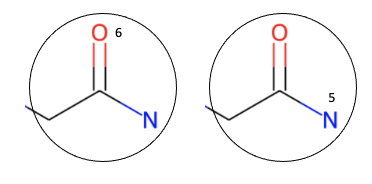

4. So, after removing such duplicates, our fingerprint set will finally be:  

>[-4080868480043360372, 8311098529014133067, -2155244659601281804, -3602994677767288312,   
>  8573586092015465947, -3879702859024654160, 2648074263463118673, 9209025387859845960,   
>  3790237506519639747, -8399737669368778010, 3271801898087186516, -8234949431280515543,   
>  -5902629546112570760, -3660103599533977242]

### Step 4 - Converting the identifiers to a bit vector

1. Now, divide each identifier with the vector length (1024) and calculate the remainder.   
In programming languages like Python, it can be achieved by using the % operator.  
      ##### e.g. -4080868480043360372 % 1024 = 908.  
      
1. Similarly, calculate the reminder for all the identifiers.  
      ##### <b>remainders = [908, 331, 244, 520, 475, 176, 849, 840, 707, 742, 84, 553, 632, 358]  </b>

1. Lastly, set the values in the <b>bit vector</b> to one at the indices equal to the remainders.   
      ##### In other words, set the values to 1 in the positions 908, 331, …, 358.  
  
>    fp=[ ] 
    remainders = [908, 331, 244, 520, 475, 176, 849, 840, 707, 742, 84, 553, 632, 358]    
  
    for x in range(1024):       
        fp.append(0)     

    for x in remainders:  
        fp[x] = 1   
  
    for x in fp:  
        print(x, end="")   

---
## Morgan Finger Print 
> fp=<b>AllChem.GetMorganFingerprintAsBitVect</b>([mol_name], [iter_num], nBits=[num], bitInfo=[dict_name])  
> ==> Morgan Finger Print Object 생성 

> ### Explaining bits from Morgan Fingerprints 
> Information is available about the atoms that contribute to particular bits in  
> the Morgan fingerprint via the <b>bitInfo</b> argument.  
> The dictionary provided is populated with one entry per bit set in the fingerprint,  

> fp1=AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, <b>bitInfo=bi</b>)  
> <b>the keys are the bit ids, the values are lists of (atom index, radius) tuples.</b> 
  
    
### dir(fp): Object 내장 method 

> ['FromBase64', 'GetBit', 'GetNumBits', 'GetNumOffBits', 'GetNumOnBits',  
>   <b>'GetOnBits'</b>, 'SetBit', 'SetBitsFromList', 'ToBase64', 'ToBinary',  
>   <b>'ToBitString', 'ToList'</b>, 'UnSetBit', 'UnSetBitsFromList',...]  

> fp.GetOnBits()     ==> <b>list(fp.GetOnBits())</b> : BitVector가 0이 아닌 Vetor index 리스트로 출력   
> fp.ToBitString() : BitVector를 모두 0/1 String으로 출력    
> fp.ToList()      : BitVector 모든 리스트 출력   

---

### Atom Identifier 
> fp = <b>AllChem.GetMorganFingerprint</b>([mol_name], [iter_num])  
> atom_id = <b>fp.GetNonzeroElements()</b> : # Atom identifier Object: {atom_identifier:bit}  

### BitVector
> fp_bit = <b>AllChem.GetMorganFingerprintAsBitVect</b>([mol_name], [iter_num], nBits=[num])  
> fp_OnBit = <b>list(fp_bit.GetOnBits())</b> : # BitVector에서 0이 아닌 vector index 출력  

### BitVector to String & List
> fp_str = <b>fp_bit.ToBitString()</b> : # BitVector를 모두 0/1 String 출력   
> fp_lst = <b>fp_bit.ToList()) </b>    : # BitVector 모든 List 출력  

### Bit Collision
> atom_identifier = <b>864662311</b>, BitVector_id = <b>807</b>  
> atom_identifier = <b>2246699815</b>, BitVector_id = <b>807</b>  

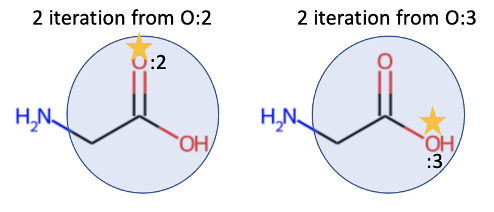

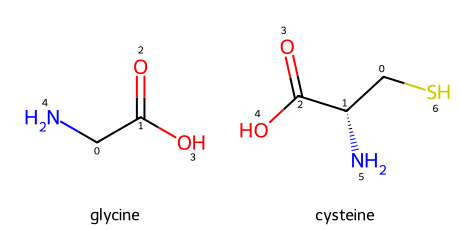

In [13]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 400,400

def mol_with_atom_index(mol):                  # atom index 넣는 function 
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol
smile_list=['C(C(=O)O)N','c1ccc(cc1)C[C@@H](C(=O)O)N',
             'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S', 'N[C@@H](Cc1c[nH]cn1)C(=O)O']

mol_list=[Chem.MolFromSmiles(smi) for smi in smile_list]

glycine = mol_list[0]
cysteine = mol_list[3]
name = ['glycine', 'cysteine']
glycine

# glycine = mol_with_atom_index(glycine)
# cysteine = mol_with_atom_index(cysteine)

img = Draw.MolsToGridImage([glycine, cysteine], molsPerRow=2, legends = name, subImgSize=(230,230))
display.display(img)

In [14]:
## ----------------------------------------------------
## Atom Identifier / # dir(fp1)
## ----------------------------------------------------
fp1 = AllChem.GetMorganFingerprint(glycine,2)                          # Atom identifier Object 생성
atom_id = fp1.GetNonzeroElements()                                     # Atom identifier Object: {atom_identifier:bit}
print("=== List of NonZero Atom Identifier ===") 
for key, val in atom_id.items():
    print(key, val)

## ----------------------------------------------------    
## BitVector  / # dir(fp1_bit)
## ----------------------------------------------------
fp1_bit   = AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024)   # BitVector Object 생성 
fp1_OnBit = list(fp1_bit.GetOnBits())                                       # BitVector에서 0이 아닌 vector index 출력
print("\n=== List of NonZero Vector Index ===") 
print(fp1_OnBit)

# BitVector to String / List
fp1_str = fp1_bit.ToBitString()                                        # BitVector를 모두 0/1 String 출력 
fp1_lst = fp1_bit.ToList()                                             # BitVector 모든 List 출력

# ----------------------------------------------------    
## Bit Collistion
## ----------------------------------------------------
vect_id = []
aid_vid = {}
for key in atom_id.keys():
    id = key % 1024
    vect_id.append(id)
    aid_vid[key]=id
    
print("\n=== List of NonZero Atom Identifier % nBits=1024 ===") 
vect_id.sort()
print(vect_id)

print("\n=== Atom Identifier : Vector Index ===") 
for key, val in aid_vid.items():
    print(key, val) 

list(fp1_bit.GetOnBits())

=== List of NonZero Atom Identifier ===
257981382 1
772927515 1
847957139 1
864662311 1
864942730 1
1510328189 1
1533864325 1
2245384272 1
2246699815 1
2592785365 1
4278941385 1

=== List of NonZero Vector Index ===
[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

=== List of NonZero Atom Identifier % nBits=1024 ===
[27, 80, 147, 389, 650, 713, 807, 807, 893, 966, 981]

=== Atom Identifier : Vector Index ===
257981382 966
772927515 27
847957139 147
864662311 807
864942730 650
1510328189 893
1533864325 389
2245384272 80
2246699815 807
2592785365 981
4278941385 713


[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

---
### BitVector & Convert to String or List
> | | |
> |---|---|   
> |fp_bit = <b>AllChem.GetMorganFingerprintAsBitVect</b>([mol_name], [iter_num], nBits=[num])| 
> |fp_OnBit = <b>list(fp_bit.GetOnBits())</b> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|: # BitVector에서 0이 아닌 vector index 출력  |
> |fp_str = <b>fp_bit.ToBitString()</b> |: # BitVector를 모두 0/1 String 출력   |
> |fp_lst = <b>fp_bit.ToList()) </b>    |: # BitVector 모든 List 출력  |

### numpy 를 이용한 array 생성 
>| | | |
>|---|---|---|  
>|fp_arr=np.zeros((1,))            |           # bitVector를 array로 변환하기 위한 빈 array 생성 | 
>| <b>DataStructs.ConvertToNumpyArray</b>(fp_bit,fp_arr)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | # fp_bit bitVector 를 fp_arry array로 변환|   
>| fp1_arr  |  |                  
>| a=np.nonzero(fp_arr)       |                 # GetOnBits() method 사용 대신 numpy 의 nonzero 함수 사용|  
>|print(a)| |
---

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
000000000000000000000000000100000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000

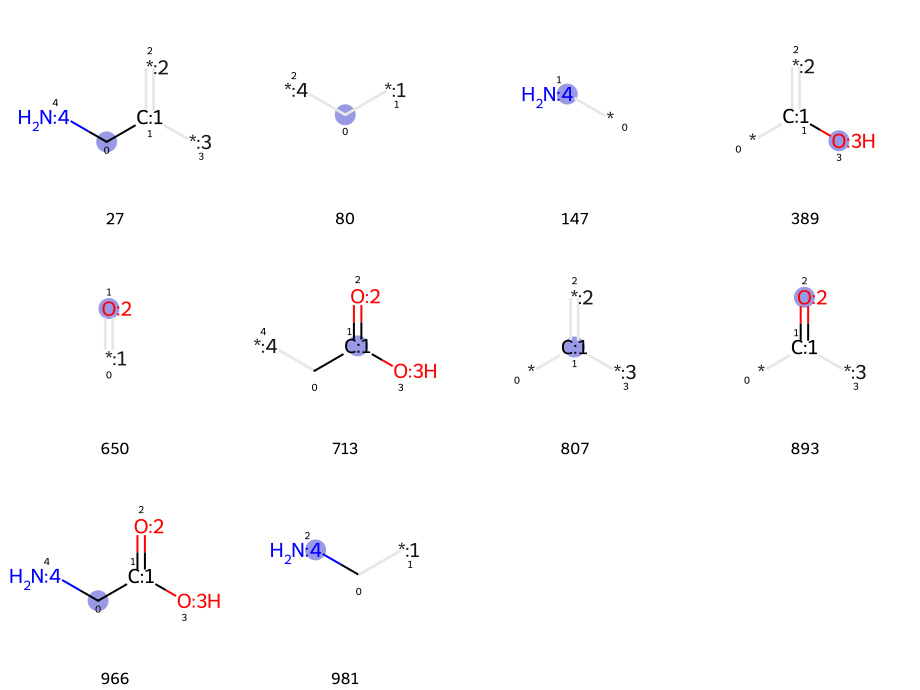

In [15]:
def mol_with_atom_index(mol):                  # atom index 넣는 function 
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

glycine = mol_with_atom_index(glycine)

bi = {}
fp1_bit=AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits=1024, bitInfo=bi)  # Morgan fp Object 생성 
# print(dir(fp1_bit))
a = list(fp1_bit.GetOnBits())                      # 1024 bitVector에서 0이 아닌 vector index 출력 
b = fp1_bit.ToBitString()                          # BitVector를 모두 0/1 String 출력     
c = fp1_bit.ToList()                               # BitVector 모든 List 출력 
print(a)
print(b)
print(c)

fp1_arr=np.zeros((1,))                           # bitVector를 array로 변환하기 위한 빈 array 생성   
DataStructs.ConvertToNumpyArray(fp1_bit,fp1_arr) # fp1 bitVector 를 fp1_arry array로 변환   
fp1_arr                    
a=np.nonzero(fp1_arr)                            # GetOnBits() method 사용 대신 numpy 의 nonzero 함수 사용
print(a)

prints = [(glycine, x, bi) for x in fp1_bit.GetOnBits()]
img=Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp1_bit.GetOnBits()], subImgSize=(230,230))
display.display(img)
# print(prints)
# prints

[1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]


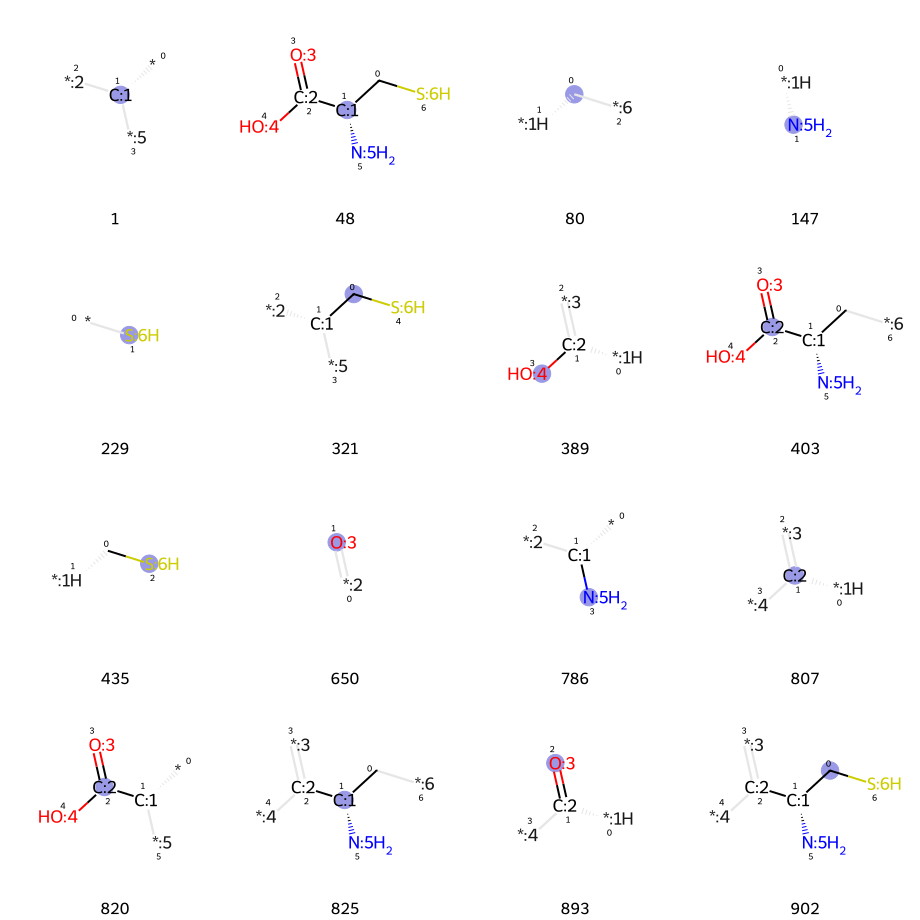

In [16]:
cysteine = mol_with_atom_index(cysteine)

bi = {}
fp2_bit=AllChem.GetMorganFingerprintAsBitVect(cysteine, 2, nBits=1024, bitInfo=bi)
print(list(fp2_bit.GetOnBits()))
non_zero=len(bi)
len_vector = len(fp2_bit.ToBitString())
# print(non_zero,len_vector)

prints = [ (cysteine, x, bi) for x in fp2_bit.GetOnBits()]
img=Draw.DrawMorganBits(prints, molsPerRow=4, legends=[str(x) for x in fp2_bit.GetOnBits()], subImgSize=(230,230))
display.display(img)

---
# 5. Similarity 
https://jcheminf.biomedcentral.com/articles/10.1186/s13321-015-0069-3  

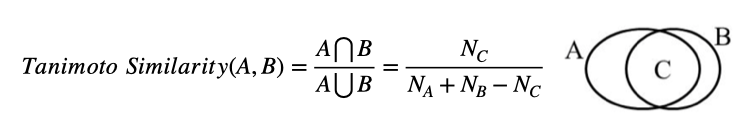

>#### DataStructs.TanimotoSimilarity(fp1_bit,fp2_bit)
>#### DataStructs.FingerprintSimilarity(fp1_bit,fp2_bit)  
>#### DataStructs.DiceSimilarity(fp1_bit,fp2_bit)
---

In [17]:
print('gly', list(fp1_bit.GetOnBits()))
print('cys', list(fp2_bit.GetOnBits()))

common   = set(fp2_bit.GetOnBits()) & set(fp1_bit.GetOnBits())
combined = set(fp2_bit.GetOnBits()) | set(fp1_bit.GetOnBits())

print('common',common)
print('combined',combined)
print('Calculated  Similarity :',len(common)/len(combined))
print("")
print('Tanimoto    Similarity :',round(DataStructs.TanimotoSimilarity(fp1_bit,fp2_bit),3))
print('Fingerprint Similarity :',round(DataStructs.FingerprintSimilarity(fp1_bit,fp2_bit),3))
print('Dice        Similarity :',round(DataStructs.DiceSimilarity(fp1_bit,fp2_bit),3))


gly [27, 80, 147, 389, 650, 713, 807, 893, 966, 981]
cys [1, 48, 80, 147, 229, 321, 389, 403, 435, 650, 786, 807, 820, 825, 893, 902]
common {389, 807, 650, 80, 147, 893}
combined {1, 321, 389, 902, 966, 713, 650, 80, 786, 147, 403, 981, 27, 229, 807, 48, 435, 820, 825, 893}
Calculated  Similarity : 0.3

Tanimoto    Similarity : 0.3
Fingerprint Similarity : 0.3
Dice        Similarity : 0.462


### Pandas & Matplotlib



In [18]:
# import pandas as pd

my_array = np.array([[11,22,33],[44,55,66]])

df = pd.DataFrame(my_array, columns = ['Column_A','Column_B','Column_C'])

print(df)
print(type(df))

df = pd.DataFrame(
    {'price': [100, 200, 300],
     'weight': [20.3, 15.1, 25.9]}, 
    index=['idx_a', 'idx_b', 'idx_c'])
df

   Column_A  Column_B  Column_C
0        11        22        33
1        44        55        66
<class 'pandas.core.frame.DataFrame'>


,price,weight
idx_a,100,20.3
idx_b,200,15.1
idx_c,300,25.9


[[1 2 3]
 [4 5 6]
 [7 8 9]]
6


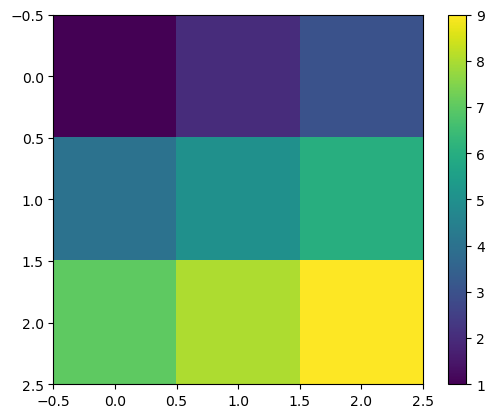

In [19]:
# import numpy as np
import matplotlib.pyplot as plt

data = [[1,2,3], [4,5,6], [7,8,9]]
f = np.array(data)
print(f)
print(f[1,2])

plt.imshow(f, interpolation="nearest", origin="upper")
plt.colorbar()
plt.show()

[[0.96055783 0.37249589 0.67856412 0.19949879 0.57285278 0.72290097
  0.0251077  0.65697788 0.20334497 0.19303779 0.64139284 0.60731831]
 [0.92965794 0.01630959 0.89102466 0.46508694 0.18127322 0.51762142
  0.66696029 0.49177645 0.31132971 0.15296467 0.0421515  0.05412899]
 [0.93054168 0.24208182 0.30889423 0.51019291 0.36870318 0.97180294
  0.63106805 0.42345858 0.75061578 0.67904188 0.3837412  0.4239283 ]
 [0.44274157 0.98561514 0.22920934 0.55252492 0.19605559 0.6971665
  0.33957321 0.8188395  0.8972509  0.84050326 0.19107933 0.67930755]
 [0.72295445 0.09866952 0.65364274 0.83814925 0.85329295 0.5453764
  0.48372479 0.19643484 0.1438791  0.19134226 0.18623471 0.70748873]
 [0.53959704 0.98762853 0.53427494 0.67915348 0.17988705 0.87410493
  0.44446624 0.83675649 0.38635586 0.95514706 0.71529425 0.09904634]
 [0.44537805 0.43299211 0.52144085 0.7340517  0.94773291 0.33363883
  0.2636881  0.50179611 0.7232426  0.95376972 0.50768988 0.93337124]
 [0.80552075 0.61982785 0.44549614 0.852327

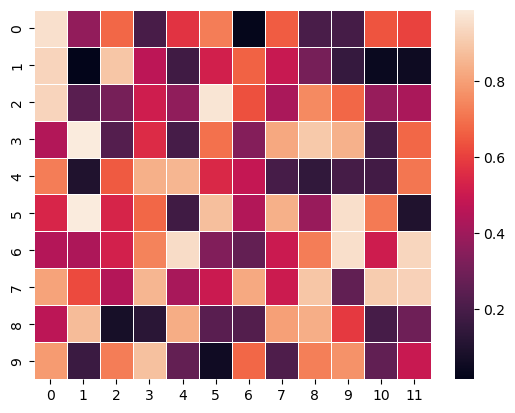

In [20]:
import seaborn as sns
# import numpy as np
# import matplotlib.pylab as plt

uniform_data = np.random.rand(10, 12)
print(uniform_data)
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()

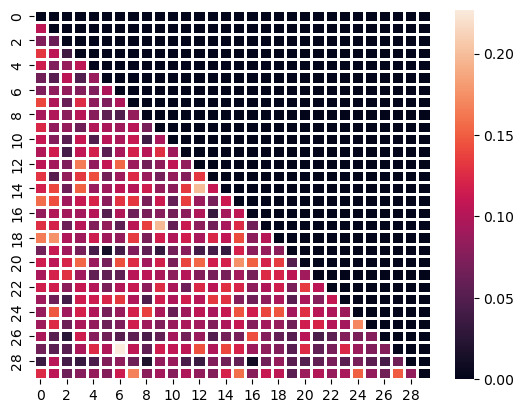

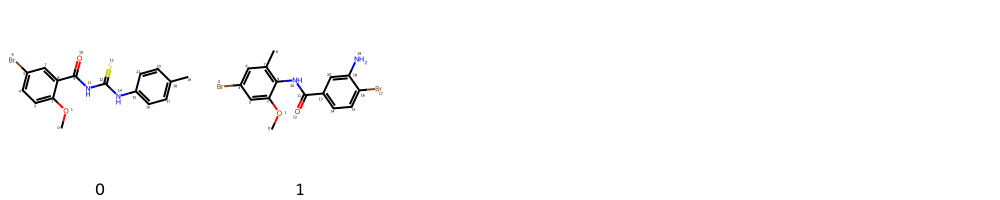

{0: [15, 18],
 1: [18],
 3: [12, 14, 20],
 6: [12, 27],
 7: [29],
 9: [17],
 12: [14, 20],
 15: [20, 29],
 16: [20],
 24: [25, 29]}

In [21]:
# import pandas as pd
# from rdkit.Chem import PandasTools
# import matplotlib.pylab as plt
# import seaborn as sns


train = pd.read_csv('train_set.ReorgE.csv', nrows=30)
# train = pd.read_csv('train_set.ReorgE.csv')

smi_dict = {}
for index, row in train.iterrows(): # index : number, row : index(train_xxx), SMILES, energy
    # smi_list.append(row['SMILES'])
    smi_dict[index]=row['SMILES']         # {index : SMILES} 생성  예: {0: 'CC[C@H]1CCCCN1C(=O)[C@@H](C)OC(=O)c1c(C)oc(-n2cccc2)c1C#N'} 
# print(smi_dict)

mol_list=[Chem.MolFromSmiles(smi) for smi in smi_dict.values()]
img = Draw.MolsToGridImage(mol_list, molsPerRow=5, legends=[str(x) for x in smi_dict.keys()])
index = [str(x) for x in smi_dict.keys()]
# display.display(img)

fp_list = []    
for id in smi_dict.keys():
    mol = mol_list[id]
    fp_id = AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=1024)
    fp_list.append(fp_id)

arr_list = []
for x in range(len(fp_list)):
    list = []
    for y in range(len(fp_list)):
        if y < x:
            list.append(round(DataStructs.TanimotoSimilarity(fp_list[x],fp_list[y]),3))
        else:
            list.append(0)
    arr_list.append(list)

arr = np.array(arr_list)
# print(arr)
df = pd.DataFrame(arr, columns = index )

ax = sns.heatmap(df, linewidth=0.9)
plt.show()

ROE = train[['Reorg_g','Reorg_ex']]
df['Reorg_g'] = ROE['Reorg_g']
df['Reorg_ex']= ROE['Reorg_ex']

b = {}
for id in range(len(fp_list)):
    a=df[df[str(id)] > 0.15]
    a_list = [ x for x in a.index ]
    if len(a_list) > 0 :
        b[id]=a_list
        
img = Draw.MolsToGridImage([mol_list[6],mol_list[27]], molsPerRow=5, legends=[str(x) for x in smi_dict.keys()])
index = [str(x) for x in smi_dict.keys()]

display.display(img)
b
# df = pd.DataFrame(
#     {'price': [100, 200, 300],
#      'weight': [20.3, 15.1, 25.9]}, 
#     index=['idx_a', 'idx_b', 'idx_c'])

---
# 6. Working with Molecule 
<b>RDKit Getting Start:</b> https://www.rdkit.org/docs/GettingStartedInPython.html 

## Looping over Atoms and Bonds

#### Once you have a molecule, it’s easy to loop over its atoms and bonds:

> | | |
> |---|---|
> |mol.GetAtoms()| # Get atom sequence (list, object) from molecule |
> |atom.GetIdx() | # Get Index of atom |
> |atom.GetAtomicNum() | # Get atomic number |
> |mol.GetAtoms()[0].GetAtomicNum()|   |
> |mol.GetBonds()| # Get bond sequence (list, object) from molecule |
> |bond.GetBondType() | # Get bond type |
> |mol.GetBonds()[0].GetBondTypes()|   |


##### You can also request individual bonds or atoms:
> | | |
> |---|---|
> |m.GetAtomWithIdx(0).GetSymbol()| # Get atomic symbol|
> |m.GetAtomWithIdx(0).GetExplicitValence()| # Get valence |
> |m.GetBondWithIdx(2).GetBeginAtomIdx()| # Get Begin Atomic Index |
> |m.GetBondWithIdx(2).GetEndAtomIdx()| # Get End atomic Index |
> |m.GetBondBetweenAtoms(1,2).GetBondType()| # Get bond type |

##### Atoms keep track of their neighbors:
> | | |
> |---|---|
> |atom = m.GetAtomWithIdx(1)| # Select atom object |
> |atom.GetNeighbors() | # Get atom list of neighbors |
> |mol.GetAtomWithIdx(1).GetNeighbors()[0].GetIdx()| # molecule 내 2번째 atom의 주변 atom중 첫번째 atom의 index | 
---

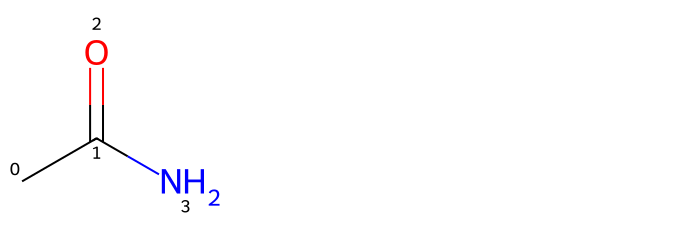

6
6
8
7
SINGLE
DOUBLE
SINGLE

 6 : Idx = 0
SINGLE

 symbol == C 
 valence == 4 
 BeginAtomIndex == 1 
 EndAtomIndex == 2 
 BondType == DOUBLE

Atomic Num of neighboring == [6, 8, 7]
Atomic Idx of neighboring == [0, 2, 3]


0

In [22]:
IPythonConsole.drawOptions.addAtomIndices = True

m = Chem.MolFromSmiles('C1OC1')
m = Chem.MolFromSmiles('CC(=O)N')
# m = Chem.MolFromSmiles('O=C1C2C1CC2')
img = Draw.MolsToGridImage([m], subImgSize=(230,230))
display.display(img)

####### Once you have a molecule, it’s easy to loop over its atoms and bonds:
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

for bond in m.GetBonds():
    print(bond.GetBondType())
    
print('\n',m.GetAtoms()[0].GetAtomicNum(), end=" : Idx = ")
print(m.GetAtoms()[0].GetIdx())
print(m.GetBonds()[0].GetBondType())

####### You can also request individual bonds or atoms:
symbol = m.GetAtomWithIdx(1).GetSymbol()
valence = m.GetAtomWithIdx(1).GetExplicitValence()
begIdx = m.GetBondWithIdx(1).GetBeginAtomIdx()              
endIdx = m.GetBondWithIdx(1).GetEndAtomIdx()               
btype = m.GetBondBetweenAtoms(1,2).GetBondType()
print ('\n symbol ==',symbol, '\n', 'valence ==', valence, '\n','BeginAtomIndex ==',begIdx, '\n','EndAtomIndex ==',endIdx, '\n','BondType ==', btype)


####### Atoms keep track of their neighbors:
atom = m.GetAtomWithIdx(1)
AtomicNum = [x.GetAtomicNum() for x in atom.GetNeighbors()]
AtomicIdx = [x.GetIdx() for x in atom.GetNeighbors()]

print('\nAtomic Num of neighboring ==', AtomicNum)
print('Atomic Idx of neighboring ==', AtomicIdx)

m.GetAtomWithIdx(1).GetNeighbors()[0].GetAtomicNum()
m.GetAtomWithIdx(1).GetNeighbors()[0].GetIdx()

## Ring Information

#### Atoms and bonds both carry information about the molecule’s rings:

> | | |
> |---|---|
> |mol.GetAtoms()| # Get atom sequence (list, object) from molecule |
> |atom.GetIdx() | # Get Index of atom |
> |atom.GetAtomicNum() | # Get atomic number |
> |mol.GetAtoms()[0].GetAtomicNum()|   |
> |mol.GetBonds()| # Get bond sequence (list, object) from molecule |
> |bond.GetBondType() | # Get bond type |
> |mol.GetBonds()[0].GetBondTypes()|   |


[{1, 2, 3, 4, 5}]
{1, 2, 3, 4, 5}


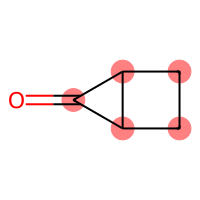

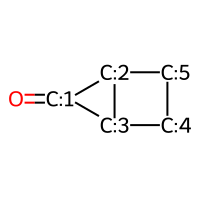

0 == 0
1 == 1
2 == 2
3 == 2
4 == 1
5 == 1
bond 0 == DOUBLE
bond 1 == SINGLE
bond 2 == SINGLE
bond 3 == SINGLE
bond 4 == SINGLE
bond 5 == SINGLE
bond 6 == SINGLE
2


TypeError: 'list' object is not callable

In [23]:
m = Chem.MolFromSmiles('O=C1C2C1CC2')
# m = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3')

def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

def GetRingSystems(mol, includeSpiro=False):
    ri = mol.GetRingInfo()
    systems = []
    for ring in ri.AtomRings():
        ringAts = set(ring)
        nSystems = []
        for system in systems:
            nInCommon = len(ringAts.intersection(system))
            if nInCommon and (includeSpiro or nInCommon>1):
                ringAts = ringAts.union(system)
            else:
                nSystems.append(system)
        nSystems.append(ringAts)
        systems = nSystems
    return systems

ringSys= GetRingSystems(m)
print(ringSys)

highlightAtoms = max(ringSys, key=len)      # ringSys 정보내에서 길이(len)가 가장 긴것 : 가장큰 ring 
print(highlightAtoms)
img1 = Draw.MolToImage(m, size=(200,200), highlightAtoms=highlightAtoms)
img2 = Draw.MolToImage(mol_with_atom_index(m), size=(200,200))
display.display(img1, img2)

ri = m.GetRingInfo()

for num in range(len(m.GetAtoms())):
    # returns the number of rings atom idx is involved in
    a=ri.NumAtomRings(num)
    print(num, "==",a)
    
ri.IsAtomInRingOfSize(1,4)

for idx in range(len(m.GetBonds())):
    print('bond',idx, '==', m.GetBonds()[idx].GetBondType())

    
ssr = Chem.GetSymmSSSR(m)
print(len(ssr))
print(list(ssr[0]))
print(list(ssr[1]))



In [ ]:
mol = Chem.MolFromSmiles('c1ccccc1CC1CC1')

bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, bitInfo=bi)
bi[872]
mfp2_svg = Draw.DrawMorganBit(mol, 872, bi)

rdkbi = {}
rdkfp = Chem.RDKFingerprint(mol, maxPath=5, bitInfo=rdkbi)
rdkbi[1553]
rdk_svg = Draw.DrawRDKitBit(mol, 1553, rdkbi)
rdk_svg

In [ ]:
mol = Chem.MolFromSmiles('C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C')
print(Chem.MolToMolBlock(mol)) 

with open('a.mol', mode='w') as f:
    f.write(Chem.MolToMolBlock(mol))

mol

In [ ]:
from rdkit.Chem import rdCoordGen
mol = Chem.MolFromSmiles('C/C=C/CC(C)C(O)C1C(=O)NC(CC)C(=O)N(C)CC(=O)N(C)C(CC(C)C)C(=O)NC(C(C)C)C(=O)N(C)C(CC(C)C)C(=O)NC(C)C(=O)NC(C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(CC(C)C)C(=O)N(C)C(C(C)C)C(=O)N1C')

rdCoordGen.AddCoords(mol)

with open('b.mol', mode='w') as f:
    f.write(Chem.MolToMolBlock(mol))

mol

In [ ]:
m = Chem.MolFromSmiles('C1OC1')

mol_list=[m]
img = Draw.MolsToGridImage(mol_list)
# img.save('a.png')
with open('a.png', mode='wb') as f:
    f.write(img.data)
display.display(Image.open('a.png'))

for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

num_bond=len(m.GetBonds())
print(num_bond)
for idx in range(num_bond):
    print(m.GetBonds()[idx].GetBondType())